# APIs

**¿Qué es una API?**

- API significa “interfaz de programación de aplicaciones” (Application Programming Interface).
- Las API son mecanismos que permiten a dos componentes de software comunicarse entre sí mediante un conjunto de definiciones y protocolos.
- La "interfaz" puede considerarse como un **contrato** de servicio entre dos aplicaciones. Este contrato define cómo se comunican entre sí mediante solicitudes y respuestas. La documentación de su API contiene información sobre cómo los desarrolladores deben estructurar esas solicitudes y respuestas.



---


**Tipos de APIs**

Existen varios tipos de APIs distintos, por ejemplo:
1. **API SOAP**: Utilizan el protocolo simple de acceso a objetos (SOAP). El cliente y el servidor intercambian mensajes mediante XML.

2. **RPC**: Estas API se denominan llamadas a procedimientos remotos. El cliente completa una función (o procedimiento) en el servidor, y el servidor devuelve el resultado al cliente.

3. **API REST**: Estas son las API más populares y flexibles que se encuentran en la web actualmente. El cliente envía las solicitudes al servidor como datos. El servidor utiliza esta entrada del cliente para iniciar funciones internas y devuelve los datos de salida al cliente, generalmente en formato JSON.

4. **WebSocket**: Utiliza objetos JSON para transmitir datos. Esta API admite la comunicación bidireccional entre las aplicaciones cliente y el servidor, es más complejo que la API REST.

Si quieren estudiar más a detalle estos conceptos les sugiero visitar el [instructivo de APIs de AWS](https://aws.amazon.com/es/what-is/api/)



---

# Consumir APIs

Para consumir APIs, podemos bien valernos del manual de la API que el equipo de desarrollo haya desarrollado, o bien buscar APIs que disponibilicen datasets en la web. Hay varias páginas que nos ofrecen listados de APIs.

**Importante**: Siempre leer el manual de la API para saber como se pide la información y cuál es el formato que devuelve!

En este caso vamos a revisar el catálogo de APIs financieras de [RapidAPI](https://rapidapi.com/category/Finance)

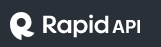

Vamos a elegir alguna que nos interese y hacer la prueba "en vivo" (puede fallar 😞)

Hoy cuando preparé la notebook probé esta API que era gratis y no pedía tarjeta de crédito <img src='https://cdn.memegenerator.es/imagenes/memes/full/23/50/23502525.jpg' />

https://rapidapi.com/apidojo/api/bloomberg-market-and-financial-news

Podemos usar Reqbin o Postman para probar la conexión a la API sin escribir código, pero RapidAPI ya tiene su propio tester de conexión así que lo podemos probar desde ahí mismo.

Veamos: Primero tenemos que leer en el manual, cómo consumir esa API.
- URL destino.
- Parámetros que deben agregarse.
- Si requiere registrarse, tendremos que incluir nuestro Token.
- Etc.

RapidAPI ya nos auto-completa los campos necesarios por lo que no hace falta leer tanto ;-)

Hagamos la prueba

... VAMOS AL LINK: https://rapidapi.com/apidojo/api/bloomberg-market-and-financial-news

...

...

...

...

...

Y si queremos hacerlo desde Python:

In [ ]:
import requests

# URL de la API
url = "https://bloomberg-market-and-financial-news.p.rapidapi.com/market/auto-complete"
querystring = {"query":"MSFT"} # en este caso buscamos acciones y noticias de Microsoft

# En este caso la API pide suscripción, asi que tenemos que crear una Key para nuestro usuario y agregarla como parámetro.
headers = { 
	"X-RapidAPI-Key": "Aca va la key!! NO PUBLICO LA MIA PARA QUE NO ME LA QUEMEN!!", # importante: Agregar la key acá!!!!!
	"X-RapidAPI-Host": "bloomberg-market-and-financial-news.p.rapidapi.com"
}

# Ejecutamos la consulta
response = requests.get(url, headers=headers, params=querystring) 

# Veamos cual es la respuesta:
response

En comunicaciones HTTP a través de internet, se utilizan códigos de respuesta para indicar el estado de la consulta. Estos quedan asociados a cada API al momento de programar la API (nosotros solo la estamos consumiendo por lo que recibimos el código).

1. Informational responses (100 – 199)
2. Successful responses (200 – 299)
3. Redirection messages (300 – 399)
4. Client error responses (400 – 499)
5. Server error responses (500 – 599)

El código de respuesta 200 significa "Successful", es decir que la petición funcionó correctamente.

Más información acerca de cada código de error: [Mozilla HTTP response codes](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status)

---

Dijimos que esa API en particular nos devuelve un objeto JSON como respuesta a 
nuestra petición. Si queremos acceder al objeto en cuestión podemos pedirle a Python que nos muestre el contenido JSON en lugar del código.

In [ ]:
response.json() # Analicemos la estructura de este archivo JSON

**PRO TIP**: Podemos usar un validador de JSON Online para analizarlo de una manera más sencilla, por ejemplo: https://codebeautify.org/jsonviewer o poner "json validator" o "json viewer" en Google y van a aparecer unos cuantos.

- Rapid API ya nos ofrecia esta forma de ver el documento en formato de árbol, lo que es muy cómodo para trabajar. Vayamos allí y veamos cuales son las Keys que nos devolvió el JSON.

Tip: Son 'quote' y 'news'.

In [ ]:
response.json()['quote']

In [ ]:
response.json()['news']

¿Es un poco engorroso de analizar, cierto?

Bueno, es momento de introducir la librería Pandas (será el tema de la clase que viene). 
<img src= 'https://images.theconversation.com/files/430483/original/file-20211105-9897-18ahqx2.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1200&h=1200.0&fit=crop' />

In [ ]:
import pandas as pd
news_df = pd.DataFrame(response.json()['news'])
news_df

In [ ]:
# Y si quiero hacer lo mismo pero para la otra clave?
